In [71]:
import pandas as pd

# Replace with your file paths
eeg = pd.read_csv("20_EEG.csv")
gsr = pd.read_csv("20_GSR.csv")
psy = pd.read_csv("20_PSY.csv")

print("EEG shape:", eeg.shape)
print("GSR shape:", gsr.shape)
print("PSY shape:", psy.shape)

print("\nEEG columns:", eeg.columns.tolist())
print("GSR columns:", gsr.columns.tolist())
print("PSY columns:", psy.columns.tolist())

print("\nFirst 5 rows of EEG:\n", eeg.head())
print("\nFirst 5 rows of GSR:\n", gsr.head())
print("\nFirst 5 rows of PSY:\n", psy.head())


EEG shape: (201323, 41)
GSR shape: (78275, 14)
PSY shape: (43, 11)

EEG columns: ['timestamp', 'UnixTime', 'QuestionKey', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'Battery', 'Elements']
GSR columns: ['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW']
PSY columns: ['Key', 'Category', 'QuestionNumber', 'matchOrnomatch', 'Difficulty', 'verdict', 'ResponseTime', 'routineStart', 'routine

C:\Users\bonga\AppData\Local\Temp\ipykernel_6852\295585838.py:4: DtypeWarning: Columns (2,40) have mixed types. Specify dtype option on import or set low_memory=False.
  eeg = pd.read_csv("20_EEG.csv")


In [72]:
import pandas as pd

# Load files
eeg = pd.read_csv("20_EEG.csv")
gsr = pd.read_csv("20_GSR.csv")
psy = pd.read_csv("20_PSY.csv")

# --- Clean EEG ---
eeg['time'] = pd.to_datetime(eeg['UnixTime'], unit='s')
eeg_clean = eeg[['time','UnixTime','Delta_TP9','Delta_AF7','Delta_AF8','Delta_TP10',
                 'Theta_TP9','Theta_AF7','Theta_AF8','Theta_TP10',
                 'Alpha_TP9','Alpha_AF7','Alpha_AF8','Alpha_TP10',
                 'Beta_TP9','Beta_AF7','Beta_AF8','Beta_TP10',
                 'Gamma_TP9','Gamma_AF7','Gamma_AF8','Gamma_TP10']]

# --- Clean GSR ---
gsr['time'] = pd.to_datetime(gsr['System Timestamp CAL'], unit='ms')
gsr_clean = gsr[['time','UnixTime','GSR Conductance CAL']].rename(
    columns={'GSR Conductance CAL':'GSR'})

# --- Clean PSY ---
psy['routineStart'] = pd.to_datetime(psy['routineStart'], unit='s')
psy['routineEnd']   = pd.to_datetime(psy['routineEnd'], unit='s')

psy_clean = psy[['Key','Difficulty','verdict','ResponseTime',
                 'routineStart','routineEnd']]

# Quick check
print("EEG cleaned:", eeg_clean.shape)
print("GSR cleaned:", gsr_clean.shape)
print("PSY cleaned:", psy_clean.shape)
print("\nPSY sample:\n", psy_clean.head())


C:\Users\bonga\AppData\Local\Temp\ipykernel_6852\3632891761.py:4: DtypeWarning: Columns (2,40) have mixed types. Specify dtype option on import or set low_memory=False.
  eeg = pd.read_csv("20_EEG.csv")


EEG cleaned: (201323, 22)
GSR cleaned: (78275, 3)
PSY cleaned: (43, 6)

PSY sample:
       Key Difficulty  verdict  ResponseTime                  routineStart  \
0   1spl1       Easy  CORRECT     11.169542 2023-01-31 07:43:07.377308607   
1   1spl2       Easy  CORRECT      7.790913 2023-01-31 07:43:18.688633680   
2  1Item1       Easy  CORRECT      3.785255 2023-01-31 07:43:26.504641770   
3  1Item2       Easy  CORRECT      6.504608 2023-01-31 07:43:30.313195705   
4  1Item3       Easy  CORRECT      7.058300 2023-01-31 07:43:36.842222691   

                     routineEnd  
0 2023-01-31 07:43:18.546850920  
1 2023-01-31 07:43:26.479546785  
2 2023-01-31 07:43:30.289896965  
3 2023-01-31 07:43:36.817804098  
4 2023-01-31 07:43:43.900522709  


In [3]:
# --- Slice EEG & GSR per trial ---
trial_windows = []

for i, row in psy_clean.iterrows():
    start, end = row['routineStart'], row['routineEnd']
    
    # slice EEG & GSR within trial window
    eeg_win = eeg_clean[(eeg_clean['time'] >= start) & (eeg_clean['time'] <= end)]
    gsr_win = gsr_clean[(gsr_clean['time'] >= start) & (gsr_clean['time'] <= end)]
    
    trial_windows.append({
        'Key': row['Key'],
        'Difficulty': row['Difficulty'],
        'verdict': row['verdict'],
        'ResponseTime': row['ResponseTime'],
        'routineStart': start,
        'routineEnd': end,
        'EEG_window': eeg_win,
        'GSR_window': gsr_win
    })

# Quick check for the first trial
first_trial = trial_windows[0]
print("Trial Key:", first_trial['Key'])
print("EEG window shape:", first_trial['EEG_window'].shape)
print("GSR window shape:", first_trial['GSR_window'].shape)
print("\nEEG window sample:\n", first_trial['EEG_window'].head())
print("\nGSR window sample:\n", first_trial['GSR_window'].head())


Trial Key: 1spl1
EEG window shape: (3358, 22)
GSR window shape: (0, 3)

EEG window sample:
                      time    UnixTime  Delta_TP9  Delta_AF7  Delta_AF8  \
43579 2023-01-31 07:43:08  1675150988   0.086627   0.285517  -0.237749   
43580 2023-01-31 07:43:08  1675150988   0.086627   0.285517  -0.237749   
43581 2023-01-31 07:43:08  1675150988   0.081166   0.292819  -0.229688   
43582 2023-01-31 07:43:08  1675150988   0.081166   0.292819  -0.229688   
43583 2023-01-31 07:43:08  1675150988   0.081166   0.292819  -0.229688   

       Delta_TP10  Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  ...  \
43579   -0.531102   0.113666   0.045569  -0.445995   -0.301266  ...   
43580   -0.531102   0.113666   0.045569  -0.445995   -0.301266  ...   
43581   -0.553456   0.113666   0.045569  -0.445995   -0.301266  ...   
43582   -0.553456   0.074810   0.035649  -0.405060   -0.277525  ...   
43583   -0.553456   0.074810   0.035649  -0.405060   -0.277525  ...   

       Alpha_AF8  Alpha_TP10  Beta_T

In [4]:
import numpy as np
from scipy.signal import find_peaks

def extract_eeg_features(eeg_win):
    feats = {}
    if eeg_win.empty:
        return {f'EEG_{col}_mean': np.nan for col in eeg_win.columns if col not in ['time','UnixTime']}
    
    for col in eeg_win.columns:
        if col in ['time','UnixTime']:
            continue
        feats[f'EEG_{col}_mean'] = eeg_win[col].mean()
        feats[f'EEG_{col}_std']  = eeg_win[col].std()
    
    # Ratios (using averages across electrodes for each band)
    theta = eeg_win[[c for c in eeg_win.columns if "Theta" in c]].mean().mean()
    alpha = eeg_win[[c for c in eeg_win.columns if "Alpha" in c]].mean().mean()
    beta  = eeg_win[[c for c in eeg_win.columns if "Beta"  in c]].mean().mean()
    
    feats['EEG_theta_alpha_ratio'] = theta / alpha if alpha != 0 else np.nan
    feats['EEG_theta_beta_ratio']  = theta / beta  if beta != 0 else np.nan
    
    return feats

def extract_gsr_features(gsr_win):
    feats = {}
    if gsr_win.empty:
        return {'GSR_mean': np.nan, 'GSR_std': np.nan, 'GSR_num_peaks': 0}
    
    arr = gsr_win['GSR'].dropna().values
    feats['GSR_mean'] = np.mean(arr)
    feats['GSR_std']  = np.std(arr)
    
    # Peak detection
    peaks, _ = find_peaks(arr, distance=50)
    feats['GSR_num_peaks'] = len(peaks)
    
    return feats

# --- Build feature table ---
feature_rows = []

for trial in trial_windows:
    eeg_feats = extract_eeg_features(trial['EEG_window'])
    gsr_feats = extract_gsr_features(trial['GSR_window'])
    
    row = {
        'Key': trial['Key'],
        'Difficulty': trial['Difficulty'],
        'verdict': trial['verdict'],
        'ResponseTime': trial['ResponseTime']
    }
    row.update(eeg_feats)
    row.update(gsr_feats)
    
    feature_rows.append(row)

features_df = pd.DataFrame(feature_rows)
print("Feature table shape:", features_df.shape)
print(features_df.head())


Feature table shape: (43, 49)
      Key Difficulty  verdict  ResponseTime  EEG_Delta_TP9_mean  \
0   1spl1       Easy  CORRECT     11.169542            0.307072   
1   1spl2       Easy  CORRECT      7.790913            0.714525   
2  1Item1       Easy  CORRECT      3.785255            0.615818   
3  1Item2       Easy  CORRECT      6.504608            0.633475   
4  1Item3       Easy  CORRECT      7.058300            0.494486   

   EEG_Delta_TP9_std  EEG_Delta_AF7_mean  EEG_Delta_AF7_std  \
0           0.274004            0.220238           0.362574   
1           0.266417            0.316905           0.327924   
2           0.101940            0.641290           0.060460   
3           0.123520            0.793867           0.198317   
4           0.155426            0.565105           0.150338   

   EEG_Delta_AF8_mean  EEG_Delta_AF8_std  ...  EEG_Gamma_AF7_std  \
0            0.117762           0.330423  ...           0.061676   
1           -0.069283           0.358095  ...       

In [5]:
# Use Difficulty column from features_df
y_bin = features_df['Difficulty'].replace({
    'Easy': 'Low',
    'Medium': 'High',
    'Difficult': 'High'
})

print(y_bin.value_counts())


Difficulty
High    25
Low     17
Name: count, dtype: int64


In [75]:
# Labels = binary Low/High
y = features_df['Difficulty'].replace({
    'Easy': 'Low',
    'Medium': 'High',
    'Difficult': 'High'
})

# Features
X = features_df.drop(columns=['Key','Difficulty','verdict']).select_dtypes(include=[np.number])


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- Binary labels ---
y = features_df['Difficulty'].replace({
    'Easy': 'Low',
    'Medium': 'High',
    'Difficult': 'High'
})

# --- Features (numeric only) ---
X = features_df.drop(columns=['Key','Difficulty','verdict']).select_dtypes(include=[np.number])
X = X.fillna(X.mean())

# --- Encode labels from scratch ---
le = LabelEncoder()
y_enc = le.fit_transform(y)   # should be 0/1 now
classes = list(le.classes_)
print("Classes after encoding:", classes, " (total:", len(classes), ")")

# --- Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42
)

# --- Train Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# --- Evaluate ---
y_pred = rf.predict(X_test)

# Force target_names length to match unique labels in y_test
unique_labels = np.unique(np.concatenate([y_test, y_pred]))
target_names = [classes[i] for i in unique_labels]

print("Classification Report:\n",
      classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classes after encoding: ['High', 'Low', nan]  (total: 3 )


C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Classification Report:
               precision    recall  f1-score   support

        High       0.67      1.00      0.80         4
         Low       1.00      0.60      0.75         5

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.78         9
weighted avg       0.85      0.78      0.77         9

Confusion Matrix:
 [[4 0]
 [2 3]]


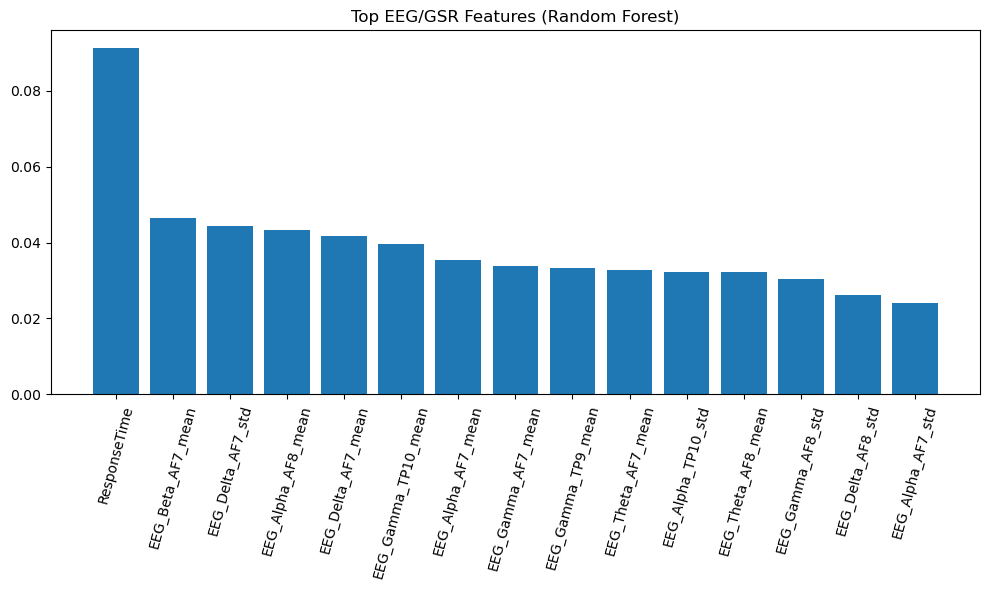

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 15 features
top_n = 15
plt.figure(figsize=(10,6))
plt.title("Top EEG/GSR Features (Random Forest)")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), X.columns[indices[:top_n]], rotation=75)
plt.tight_layout()
plt.show()


In [79]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# --- Binary labels ---
y_bin = features_df['Difficulty'].replace({
    'Easy': 'Low',
    'Medium': 'High',
    'Difficult': 'High'
})

# Features = numeric only
X = features_df.drop(columns=['Key','Difficulty','verdict']).select_dtypes(include=[np.number])
X = X.fillna(X.mean())

# Encode labels
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
y_enc = le.fit_transform(y_bin)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Cross-validation with predictions ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_bin = RandomForestClassifier(n_estimators=200, random_state=42)

y_pred = cross_val_predict(rf_bin, X_scaled, y_enc, cv=cv)

print("Classification Report:\n", classification_report(y_enc, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_enc, y_pred))


C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.88      0.82      0.85        17
           2       0.00      0.00      0.00         1

    accuracy                           0.86        43
   macro avg       0.58      0.58      0.58        43
weighted avg       0.84      0.86      0.85        43

Confusion Matrix:
 [[23  2  0]
 [ 3 14  0]
 [ 1  0  0]]


C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bonga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
!pip install shap



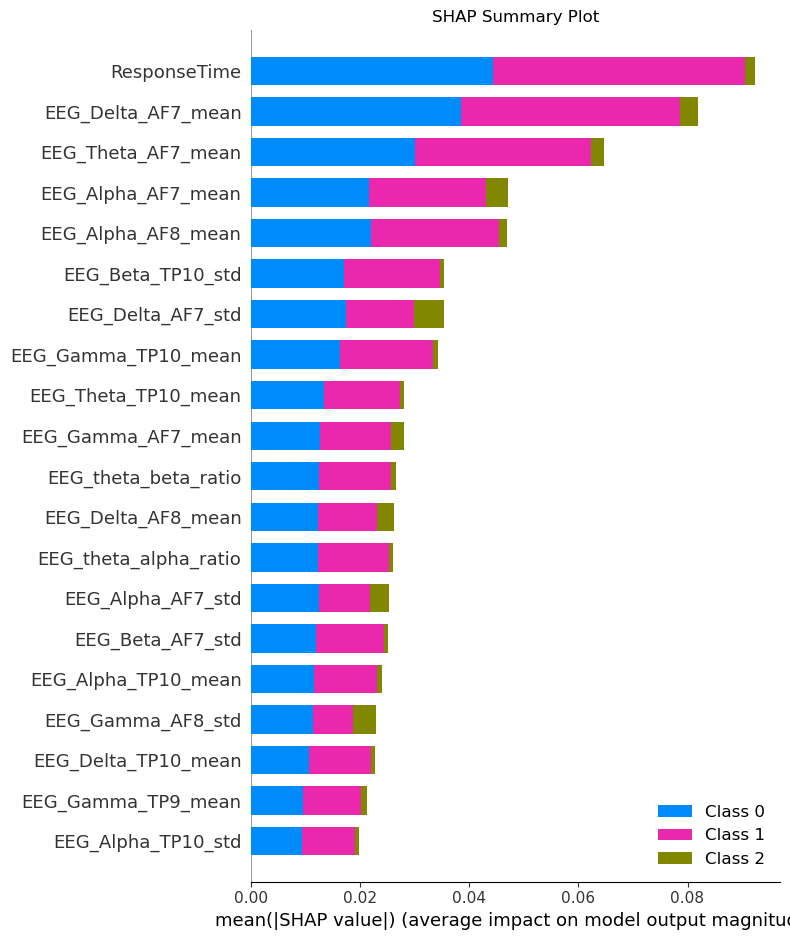

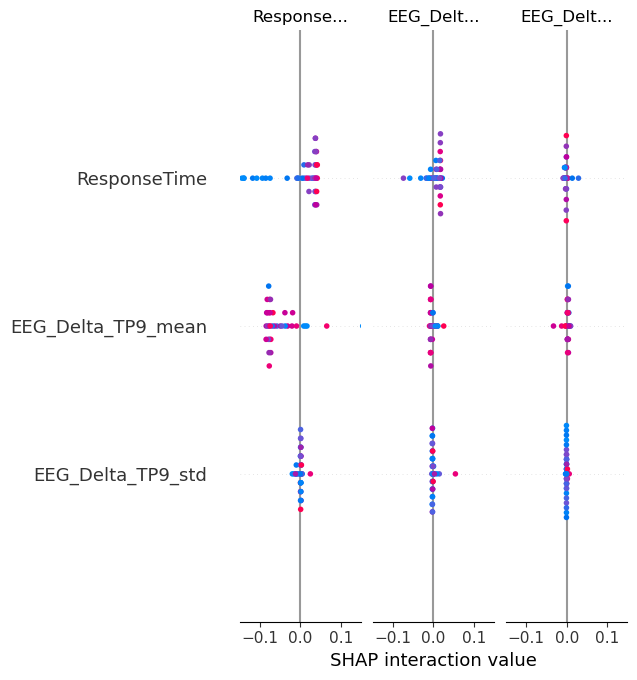

In [11]:
import shap
import matplotlib.pyplot as plt

# Fit final model on all data
rf_bin.fit(X_scaled, y_enc)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_bin)
shap_values = explainer.shap_values(X_scaled)

# --- Global importance ---
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.show()

# --- Detailed feature impact ---
shap.summary_plot(shap_values, X, show=False)
plt.show()


In [12]:
import joblib

# Save model and scaler
joblib.dump(rf_bin, "rf_cognitive_load_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved!")


Model and scaler saved!


In [35]:
# Reload later
rf_loaded = joblib.load("rf_cognitive_load_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")

# Example: take first 5 trials
new = int(input("Enter the row which you want to predicit"))
X_new = X.iloc[:new]
X_new_scaled = scaler_loaded.transform(X_new)

y_pred_new = rf_loaded.predict(X_new_scaled)
print("Predicted classes:", le.inverse_transform(y_pred_new))


Enter the row which you want to predicit 10


Predicted classes: ['Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'High' 'High' 'High']
